# EDA Notebook

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../data/raw/Sample-Superstore.csv", encoding='latin1',
                  parse_dates=["Order Date", "Ship Date"])

# Data Quality Checks
- Are datatypes correct?
- Any missing values?
- Any weird dates? (future orders)
    - Should be fine as we filtered on year
- Any other outliers?

In [2]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

Datatypes pretty easy, most are strings. Converted dates to datetime when reading csv

In [4]:
print(f"{df.isnull().sum().sum()} NULL values")
print(f"{df.duplicated().sum()} duplicate rows")

0 NULL values
0 duplicate rows


All good so far. Any outliers?

In [5]:
df.describe()

,Row ID,Order Date,Ship Date,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2016-04-30 00:07:12.259355648,2016-05-03 23:06:58.571142912,55190.379428,229.858001,3.789574,0.156203,28.656896
min,1.000000,2014-01-03 00:00:00,2014-01-07 00:00:00,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,2015-05-23 00:00:00,2015-05-27 00:00:00,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2016-06-26 00:00:00,2016-06-29 00:00:00,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2017-05-14 00:00:00,2017-05-18 00:00:00,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2017-12-30 00:00:00,2018-01-05 00:00:00,99301.000000,22638.480000,14.000000,0.800000,8399.976000
std,2885.163629,NaN,NaN,32063.693350,623.245101,2.225110,0.206452,234.260108


In [6]:
df.sort_values(by="Sales", ascending=False).head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
2697,2698,CA-2014-145317,2014-03-18,2014-03-23,Standard Class,SM-20320,Sean Miller,Home Office,United States,Jacksonville,...,32216,South,TEC-MA-10002412,Technology,Machines,Cisco TelePresence System EX90 Videoconferenci...,22638.480,6,0.5,-1811.0784
6826,6827,CA-2016-118689,2016-10-02,2016-10-09,Standard Class,TC-20980,Tamara Chand,Corporate,United States,Lafayette,...,47905,Central,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,17499.950,5,0.0,8399.9760
8153,8154,CA-2017-140151,2017-03-23,2017-03-25,First Class,RB-19360,Raymond Buch,Consumer,United States,Seattle,...,98115,West,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,13999.960,4,0.0,6719.9808
2623,2624,CA-2017-127180,2017-10-22,2017-10-24,First Class,TA-21385,Tom Ashbrook,Home Office,United States,New York City,...,10024,East,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,11199.968,4,0.2,3919.9888
4190,4191,CA-2017-166709,2017-11-17,2017-11-22,Standard Class,HL-15040,Hunter Lopez,Consumer,United States,Newark,...,19711,East,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,10499.970,3,0.0,5039.9856


In [7]:
df.sort_values(by="Profit").head(10)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
7772,7773,CA-2016-108196,2016-11-25,2016-12-02,Standard Class,CS-12505,Cindy Stewart,Consumer,United States,Lancaster,...,43130,East,TEC-MA-10000418,Technology,Machines,Cubify CubeX 3D Printer Double Head Print,4499.985,5,0.7,-6599.9780
683,684,US-2017-168116,2017-11-04,2017-11-04,Same Day,GT-14635,Grant Thornton,Corporate,United States,Burlington,...,27217,South,TEC-MA-10004125,Technology,Machines,Cubify CubeX 3D Printer Triple Head Print,7999.980,4,0.5,-3839.9904
9774,9775,CA-2014-169019,2014-07-26,2014-07-30,Standard Class,LF-17185,Luke Foster,Consumer,United States,San Antonio,...,78207,Central,OFF-BI-10004995,Office Supplies,Binders,GBC DocuBind P400 Electric Binding System,2177.584,8,0.8,-3701.8928
3011,3012,CA-2017-134845,2017-04-17,2017-04-23,Standard Class,SR-20425,Sharelle Roach,Home Office,United States,Louisville,...,80027,West,TEC-MA-10000822,Technology,Machines,Lexmark MX611dhe Monochrome Laser Printer,2549.985,5,0.7,-3399.9800
4991,4992,US-2017-122714,2017-12-07,2017-12-13,Standard Class,HG-14965,Henry Goldwyn,Corporate,United States,Chicago,...,60653,Central,OFF-BI-10001120,Office Supplies,Binders,Ibico EPK-21 Electric Binding System,1889.990,5,0.8,-2929.4845
3151,3152,CA-2015-147830,2015-12-15,2015-12-18,First Class,NF-18385,Natalie Fritzler,Consumer,United States,Newark,...,43055,East,TEC-MA-10000418,Technology,Machines,Cubify CubeX 3D Printer Double Head Print,1799.994,2,0.7,-2639.9912
5310,5311,CA-2017-131254,2017-11-19,2017-11-21,First Class,NC-18415,Nathan Cano,Consumer,United States,Houston,...,77095,Central,OFF-BI-10003527,Office Supplies,Binders,Fellowes PB500 Electric Punch Plastic Comb Bin...,1525.188,6,0.8,-2287.7820
9639,9640,CA-2015-116638,2015-01-28,2015-01-31,Second Class,JH-15985,Joseph Holt,Consumer,United States,Concord,...,28027,South,FUR-TA-10000198,Furniture,Tables,Chromcraft Bull-Nose Wood Oval Conference Tabl...,4297.644,13,0.4,-1862.3124
1199,1200,CA-2016-130946,2016-04-08,2016-04-12,Standard Class,ZC-21910,Zuschuss Carroll,Consumer,United States,Houston,...,77041,Central,OFF-BI-10004995,Office Supplies,Binders,GBC DocuBind P400 Electric Binding System,1088.792,4,0.8,-1850.9464
2697,2698,CA-2014-145317,2014-03-18,2014-03-23,Standard Class,SM-20320,Sean Miller,Home Office,United States,Jacksonville,...,32216,South,TEC-MA-10002412,Technology,Machines,Cisco TelePresence System EX90 Videoconferenci...,22638.480,6,0.5,-1811.0784


- Was concerned by Sales but seems reasonable. Low value is basic office supplies, high value is binding machine + printers so all seems reasonable. 
- Also aware of negatives in the profit column, I would assume this means a loss was made.
    - Values seem a little larger than I would expect...Seeing a -2639 profit on a sale of 1799 seems strange although if the discount column is 0.7 does that mean a 70% discount was applied not the customer paid 70%. Yep that seems to be roughly what I would expect.

### Additional Clean-up

In [8]:
if 'Country' in df.columns and df['Country'].nunique() == 1:
    df.drop(columns=["Country"], inplace=True)

# Extract useful time features
df["Order Year"] = df["Order Date"].dt.year
df["Order Month"] = df["Order Date"].dt.month
df["Order Month-Year"] = df["Order Date"].dt.to_period("M")
df["Ship Year"] = df["Ship Date"].dt.year
df["Ship Month"] = df["Ship Date"].dt.month
df["Ship Month-Year"] = df["Ship Date"].dt.to_period("M")

df['Profitability']=df['Profit']/df['Sales']

# Basic Trends
These are all things that might be useful to glance at in a PowerBI report to see distributions of these discrete variables. For example, we might want to push "Corporate" sales and then the top-right plot would allow us to see that increasing.

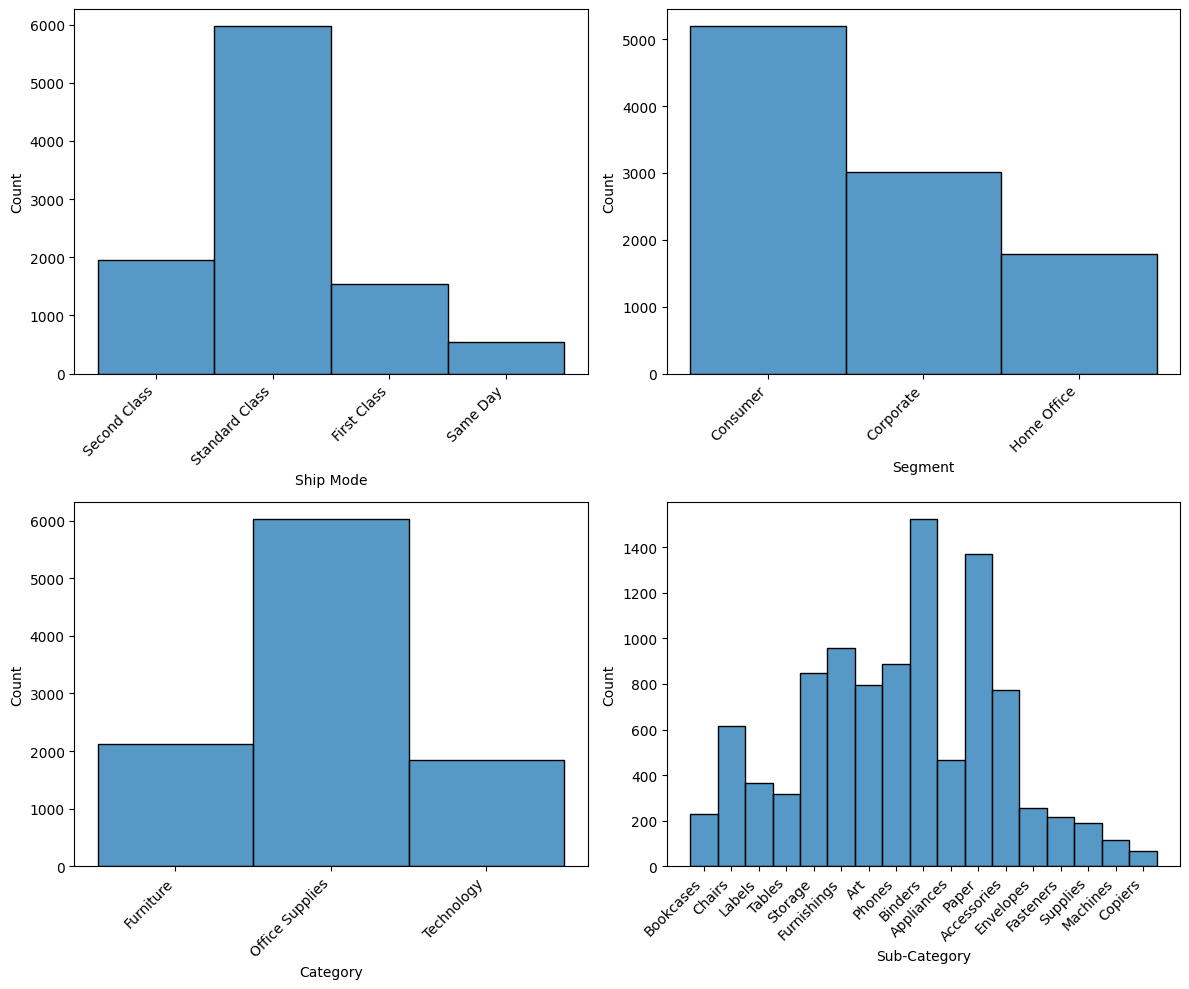

In [9]:
discrete_columns = ["Ship Mode", "Segment", "Category", "Sub-Category"]
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
for i, col in enumerate(discrete_columns):
    sns.histplot(df[col], discrete=True, ax=axes[i // 2, i % 2])
    plt.setp(axes[i // 2, i % 2].get_xticklabels(), rotation=45, ha='right')
plt.tight_layout()
plt.show()

Most are "Consumers" shipping "Standard Class" "Office Supplies" and these are largely "Binders" and "Paper".

Could visualise City, State, Region using geographical plots? $\rightarrow$ Maybe job for PowerBI

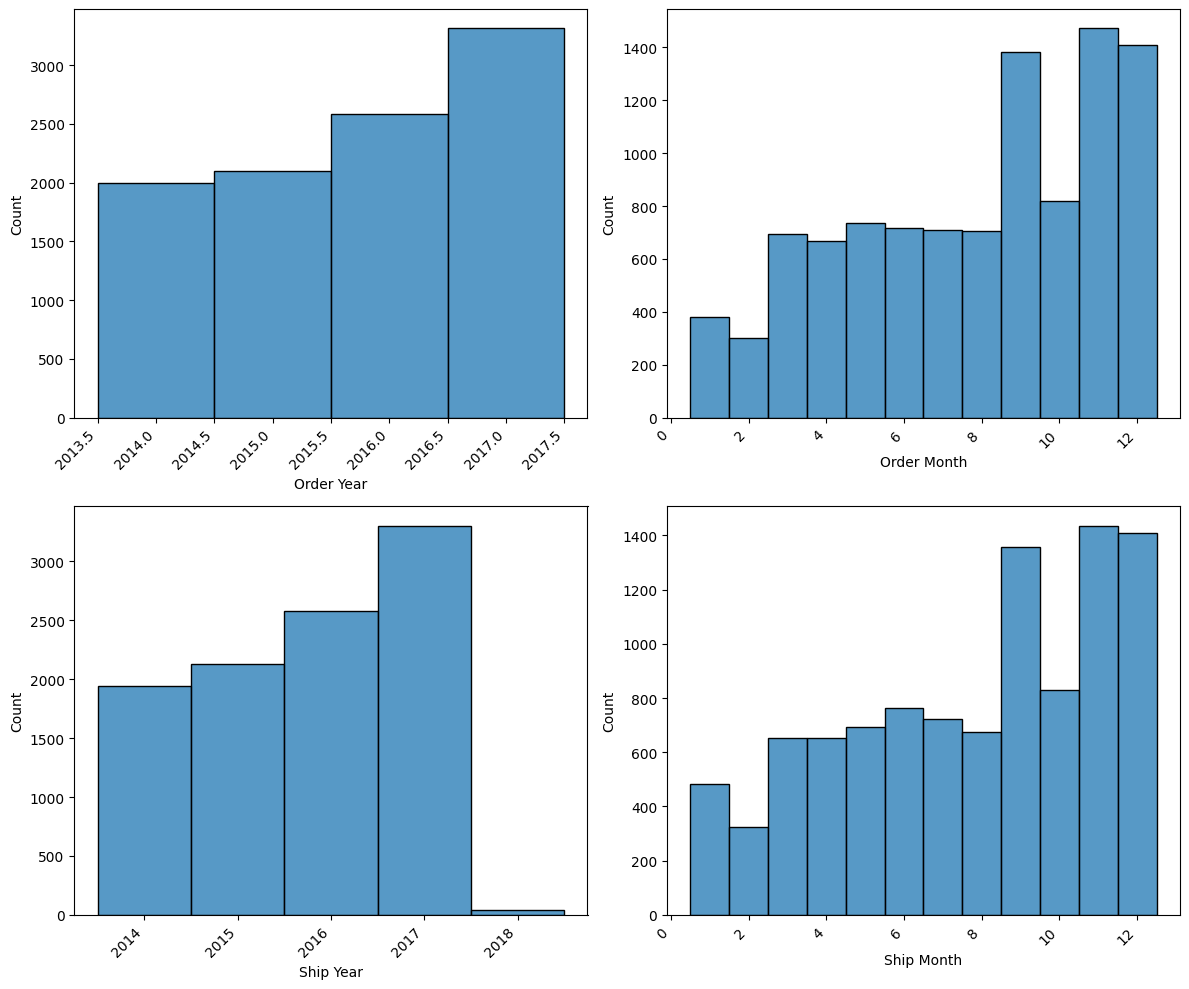

In [10]:
date_columns = ["Order Year", "Order Month", "Ship Year", "Ship Month"]
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
for i, col in enumerate(date_columns):
    sns.histplot(df[col], discrete=True, ax=axes[i // 2, i % 2])
    plt.setp(axes[i // 2, i % 2].get_xticklabels(), rotation=45, ha='right')
plt.tight_layout()
plt.show()

Number of orders are increasing over time. Things peak in September (going back to school?) and then Christmas time (Nov/Dec).

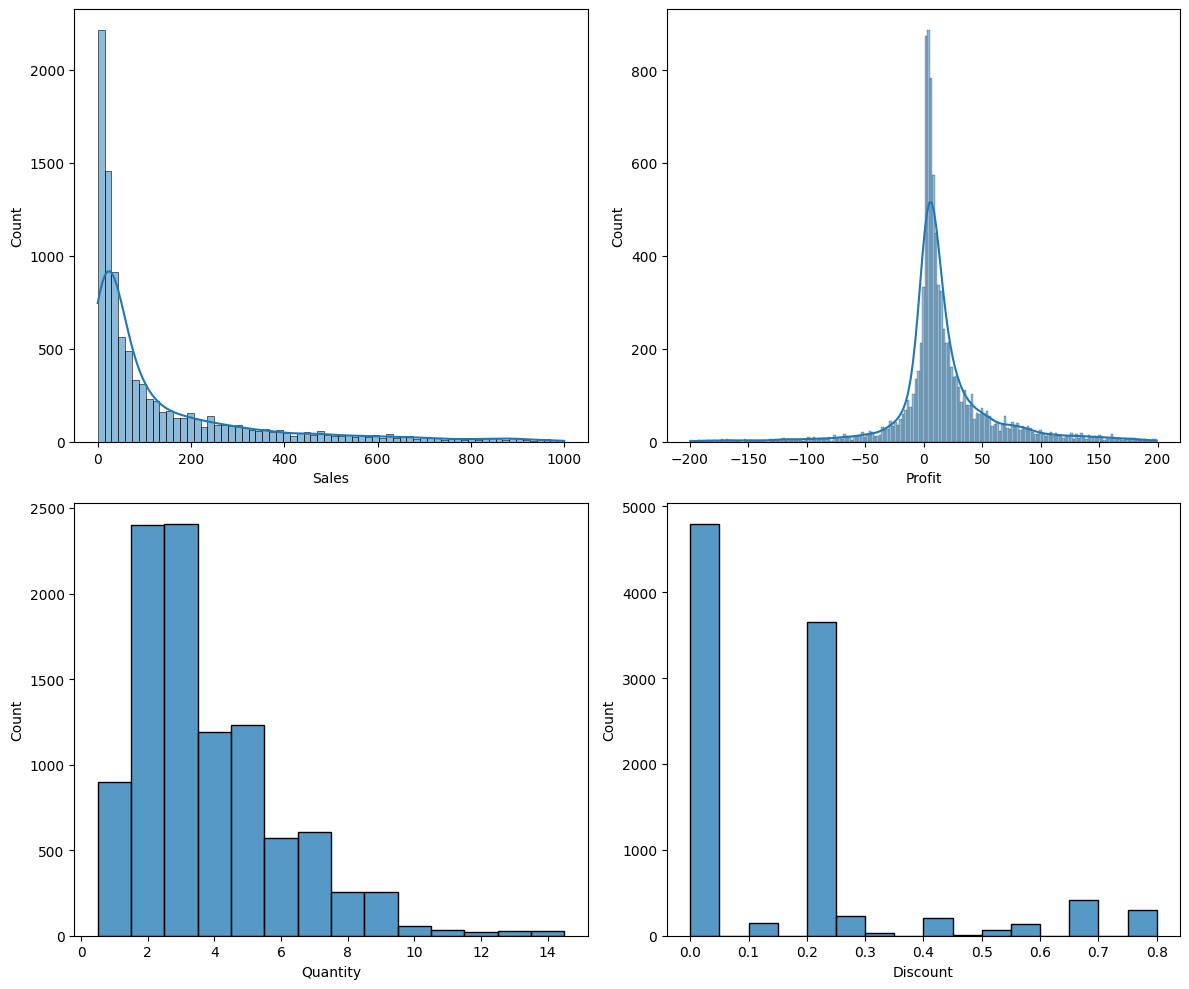

In [11]:
continuous_columns = ["Sales", "Profit", "Quantity", "Discount"]
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

sns.histplot(df[df["Sales"] < 1000]["Sales"], kde=True, ax=axes[0, 0])
sns.histplot(df[(df["Profit"] < 200) & (df["Profit"] > -200)]["Profit"], kde=True, ax=axes[0, 1])
sns.histplot(df["Quantity"], discrete=True, ax=axes[1, 0])
sns.histplot(df["Discount"], ax=axes[1, 1], binwidth=0.05)
plt.tight_layout()
plt.show()

Note the filters applied to "Sales" and "Profit", this is so I can better see the distributions at the centre of the data and less focus on the outliers.

- Sales are generally quite low values. 
- Profits are roughly centered around just above zero and are right-skewed.
- Quantities are generally small (large majority are 2 or 3)
- Discount is largely zero with another large bump around 20% $\rightarrow$ Does this tie into marketing discounts?

# Which products/categories/sub-categories have the most sales?

In [12]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Quantity,Discount,Profit,Order Year,Order Month,Order Month-Year,Ship Year,Ship Month,Ship Month-Year,Profitability
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,...,2,0.00,41.9136,2016,11,2016-11,2016,11,2016-11,0.1600
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,...,3,0.00,219.5820,2016,11,2016-11,2016,11,2016-11,0.3000
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,Los Angeles,California,...,2,0.00,6.8714,2016,6,2016-06,2016,6,2016-06,0.4700
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,...,5,0.45,-383.0310,2015,10,2015-10,2015,10,2015-10,-0.4000
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,...,2,0.20,2.5164,2015,10,2015-10,2015,10,2015-10,0.1125


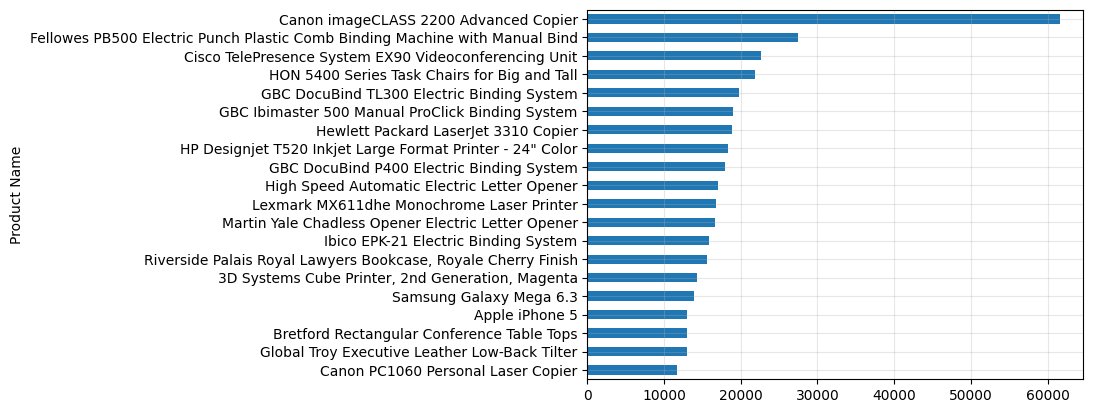

In [13]:
df.groupby("Product Name")["Sales"].sum().sort_values(ascending=True).tail(20).plot.barh()
plt.grid(alpha=0.3)

I don't think product name is particularly useful for us. This might be interesting for a stakeholder though if they really wanted to dive into which products. Let's focus on a less granular level for now and look at categories/sub-categories.

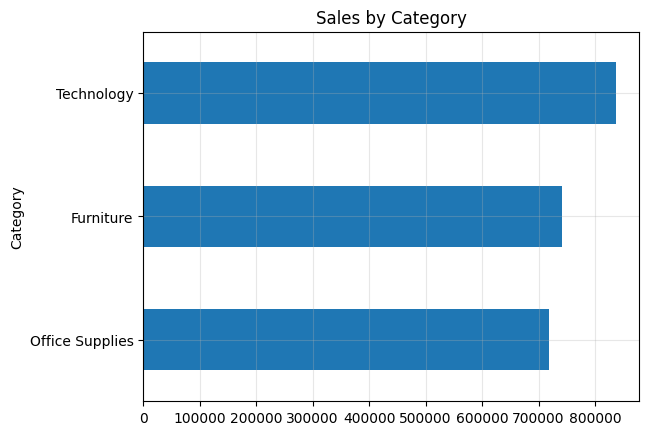

In [14]:
df.groupby("Category")["Sales"].sum().sort_values(ascending=True).tail(20).plot.barh()
plt.title("Sales by Category")
plt.grid(alpha=0.3)

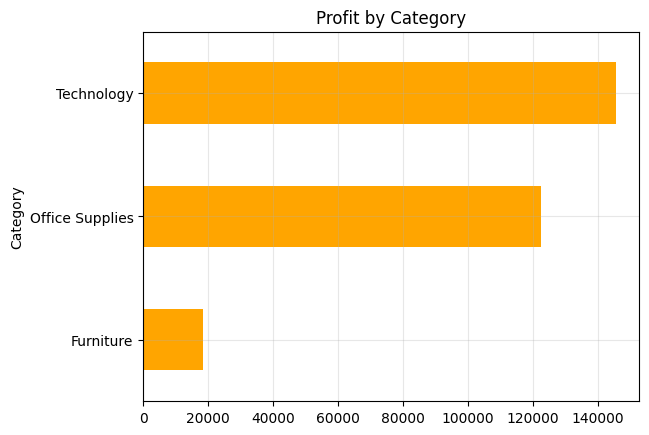

In [15]:
df.groupby("Category")["Profit"].sum().sort_values(ascending=True).tail(20).plot.barh(color='orange')
plt.title("Profit by Category")
plt.grid(alpha=0.3)

Text(0.5, 1.0, 'Profitability (Profit/Sales) by Category')

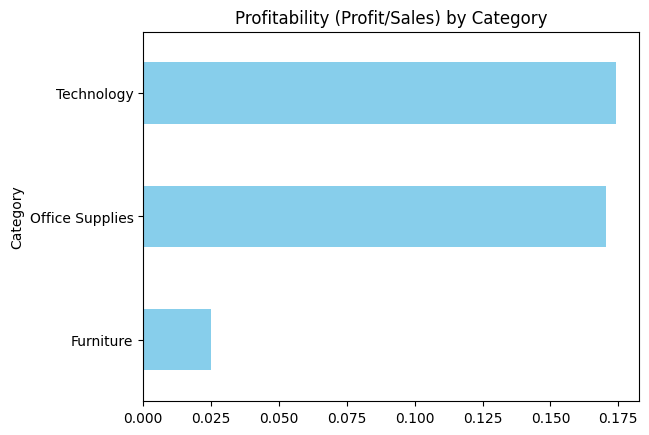

In [21]:
category_summary = df.groupby("Category").agg(
    Total_Sales=("Sales", "sum"),
    Total_Profit=("Profit", "sum")
)
category_summary["Profitability"] = category_summary["Total_Profit"] / category_summary["Total_Sales"]
sorted_category_summary = category_summary.sort_values(by="Profitability", ascending=True)
sorted_category_summary["Profitability"].plot.barh(
    color=sorted_category_summary['Profitability'].apply(lambda x: 'red' if x < 0 else 'skyblue') # Color based on profit/loss
)
plt.title("Profitability (Profit/Sales) by Category")

Furniture while this makes a reasonable amount in sales, does not return much profit.

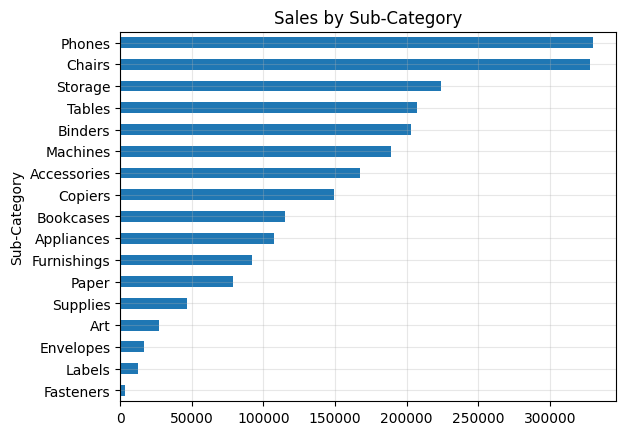

In [16]:
df.groupby("Sub-Category")["Sales"].sum().sort_values(ascending=True).tail(20).plot.barh()
plt.title("Sales by Sub-Category")
plt.grid(alpha=0.3)

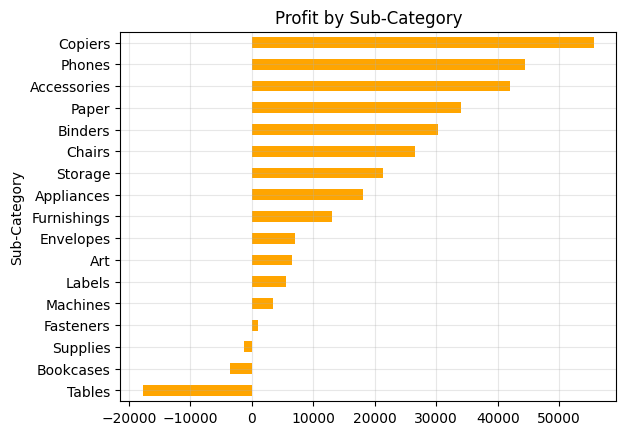

In [17]:
df.groupby("Sub-Category")["Profit"].sum().sort_values(ascending=True).tail(20).plot.barh(color='orange')
plt.title("Profit by Sub-Category")
plt.grid(alpha=0.3)

Interesting that we make a loss on a few sub-categories and make a huge loss in Tables.

Text(0.5, 1.0, 'Profitability (Profit/Sales) by Category')

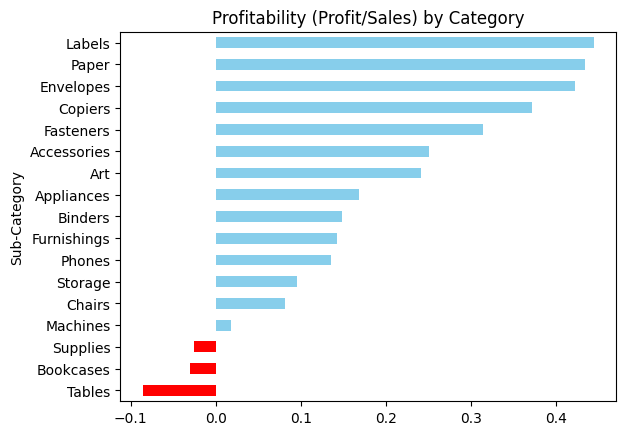

In [22]:
sub_category_summary = df.groupby("Sub-Category").agg(
    Total_Sales=("Sales", "sum"),
    Total_Profit=("Profit", "sum")
)
sub_category_summary["Profitability"] = sub_category_summary["Total_Profit"] / sub_category_summary["Total_Sales"]
sorted_sub_category_summary = sub_category_summary.sort_values(by="Profitability", ascending=True)
sorted_sub_category_summary["Profitability"].plot.barh(
    color=sorted_sub_category_summary['Profitability'].apply(lambda x: 'red' if x < 0 else 'skyblue') # Color based on profit/loss
)
plt.title("Profitability (Profit/Sales) by Category")

# Sales/Profit over time

Text(0.5, 0, 'Order Date')

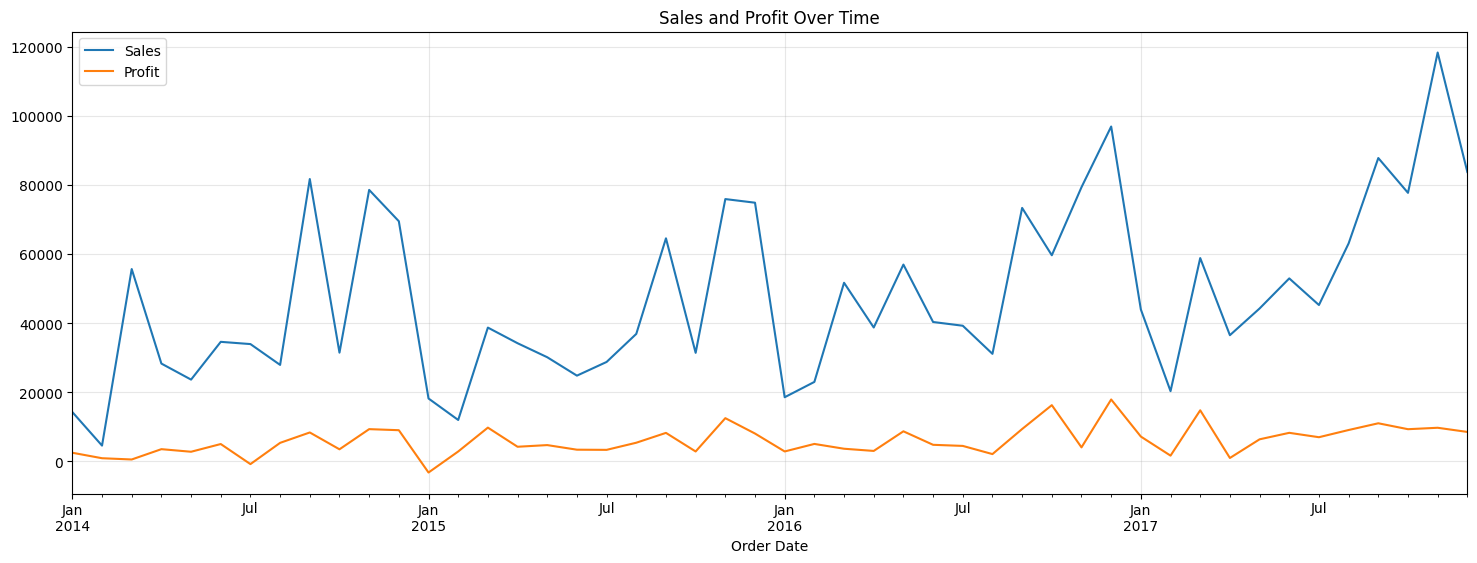

In [35]:
plt.figure(figsize=(18, 6))
plt.title("Sales and Profit Over Time")
df.groupby("Order Month-Year")["Sales"].sum().plot(label="Sales")
df.groupby("Order Month-Year")["Profit"].sum().plot(label="Profit")
plt.grid(alpha=0.3)
plt.legend()
plt.xlabel("Order Date")

Text(0.5, 0, 'Order Month')

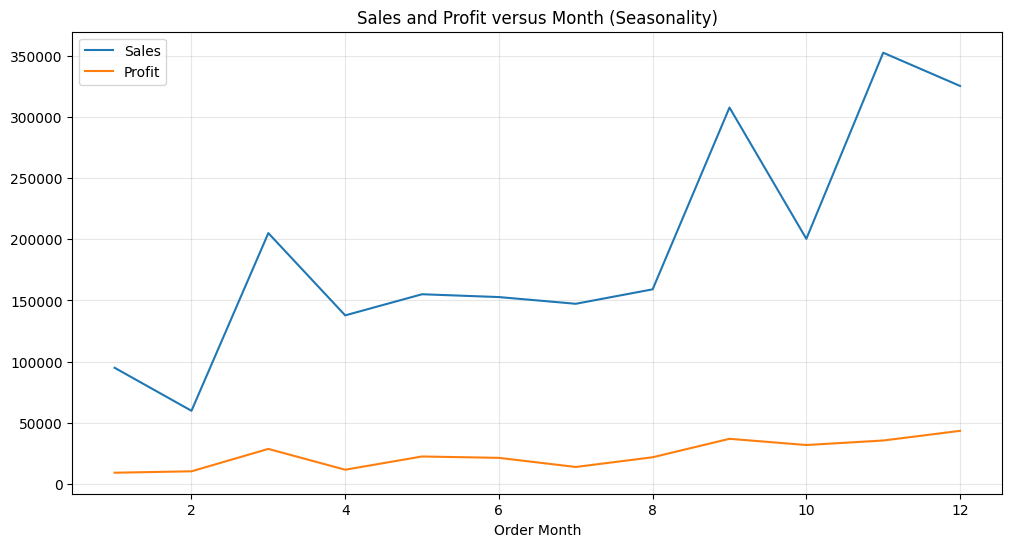

In [36]:
plt.figure(figsize=(12, 6))
plt.title("Sales and Profit versus Month (Seasonality)")
df.groupby("Order Month")["Sales"].sum().plot(label="Sales")
df.groupby("Order Month")["Profit"].sum().plot(label="Profit")
plt.grid(alpha=0.3)
plt.legend()
plt.xlabel("Order Month")

Sales and profit increase later in the year